In [3]:
import torch
import plotly
import matplotlib
from matplotlib import pyplot as plt
import torch.nn as nn
import numpy as np
import os

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.__version__, torchvision.__version__, torchaudio.__version__,

('2.5.1+cu124', '0.20.1+cu124', '2.5.1+cu124')

In [ ]:
t1_, t2_ = torch.meshgrid(torch.linspace(-10, 10, 10), torch.linspace(-10, 10, 10))
t1_, t2_

In [5]:
tall_ = torch.cat(
    (t1_.unsqueeze(-1), t2_.unsqueeze(-1)), dim=1).view(-1, 2)

In [6]:
tall_.shape

torch.Size([100, 2])

In [ ]:
def meshgrid(mesh=500, x_m = 2):
  t1_, t2_ = torch.meshgrid(torch.linspace(-x_m, x_m, mesh),
                            torch.linspace(-x_m, x_m, mesh))
  tall_ = torch.cat(
    ([t1_.unsqueeze(-1), t2_.unsqueeze(-1)]), dim=-1).view(-1, 2)
  return tall_
meshgrid()

In [10]:
import plotly.graph_objs as go_objs
title = "working-with-vectors"
l_ = go_objs.Layout(title=go_objs.layout.Title(text=title, x=0.9),
                    xaxis={'title': 'x'}, yaxis={'title': 'y'} )
A = np.array([0.34, 0.56])
names = ['A']
vectors_ = [A]

def plotvectors(vectors, names):
  points_ = []
  for (x,y), name in zip(vectors_, names):
    point_= [go_objs.Scatter(x=[0,x], y=[0,y], name=name)]
    points_ += point_

  figure = go_objs.Figure(data=points_, layout=l_)
  figure.update_layout(autosize=False, width=600, height=400,
            title=title, yaxis=dict(), xaxis=dict())
  for (x,y), name in zip(vectors_, names):
    figure.add_annotation(
        x=x, y=y,
        text=f'{name}-> [{x:.2f}, {y:.2f}]'),
    #arrowhead=2, arrowsize=1, arrowidth=2, arrowclor='b')
  return figure
plotvectors(vectors_, names)

In [ ]:
mgrid_xy = meshgrid(40, 2).detach().numpy()
mgrid_xy

Text(0.5, 1.0, 'grid in xy space')

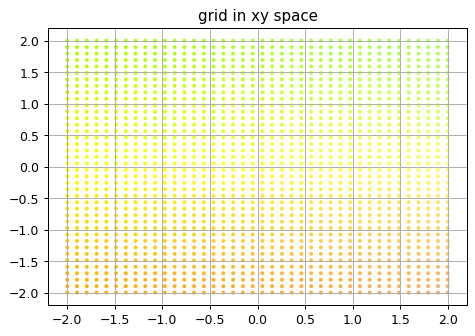

In [60]:
import matplotlib
from matplotlib import pyplot as plt

def colorizer(x, y):
  return (min(1, 1-y/6), min(1, 1+y/6), 1/5 +x/10)

colors = list(map(colorizer, mgrid_xy[:,0], mgrid_xy[:,1]))
plt.figure(figsize=(6,4), facecolor='w', dpi=90)
plt.scatter(mgrid_xy[:,0], mgrid_xy[:,1], s=10, c=colors, edgecolor = "none")
plt.grid(True)
#plt.axis('equal')
plt.title('grid in xy space')

In [21]:
A = np.array([0.84, 0.53])
scale_d = np.array([[.5, 0], [0, .5]])
AS = scale_d@A
names = ['A', 'AS']
vectors_ = [A, AS]
A, scale_d@A

(array([0.84, 0.53]), array([0.42 , 0.265]))

In [22]:
plotvectors(vectors_, names)

In [73]:
def pltgrid(mgrids, titles, colors, figsize=(10,8)):
  c = len(mgrids)
  fig, axes = plt.subplots(1, c, figsize=figsize, dpi=65, sharey=True)
  for ax, mgrid_xy, title in zip(axes, mgrids, titles):
    ax.scatter(mgrid_xy[:,0], mgrid_xy[:,1], s=36, c=colors, edgecolor = "none")
    ax.grid(True)
    #ax.axis('equal')
    #ax.set_aspect('equal')
    ax.set_title(title)
  plt.show()

In [74]:
import copy
mgrid_xy_ = mgrid_xy.copy()
for i in range(mgrid_xy_.shape[0]):
  mgrid_xy_[i,:] = scale_d@mgrid_xy_[i,:]

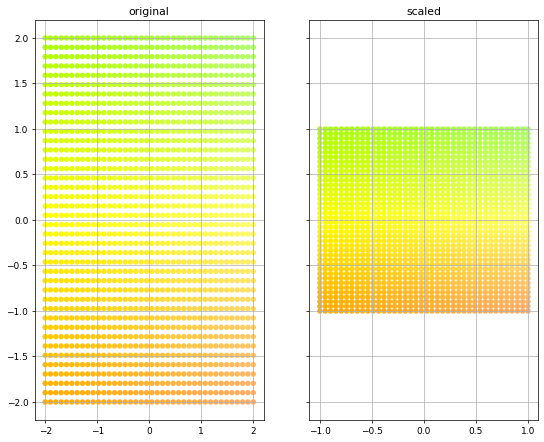

In [75]:
pltgrid([mgrid_xy, mgrid_xy_], titles = ["original", "scaled"], colors=colors)

In [76]:
reflection_r = np.array([[1,0], [0,-1]])
reflection_r

array([[ 1,  0],
       [ 0, -1]])

In [77]:
AR_Y = reflection_r@A
AR_Y

array([ 0.84, -0.53])

In [78]:
names = ['A', 'AR_Y']
vectors_ = [A, AR_Y]
plotvectors(vectors_, names)

In [55]:
mgrid_xy_ = mgrid_xy.copy()
for i in range(mgrid_xy_.shape[0]):
  mgrid_xy_[i,:] = reflection_r@mgrid_xy_[i,:]

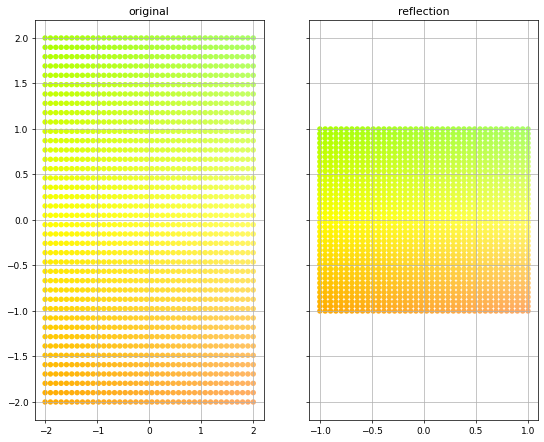

In [79]:
pltgrid([mgrid_xy, mgrid_xy_], titles = ["original", "reflection"], colors=colors)

In [80]:
transform_r = np.array([[1,0], [0.5,1]])
transform_r

array([[1. , 0. ],
       [0.5, 1. ]])

In [81]:
AT_Y = transform_r@A
AT_Y

array([0.84, 0.95])

In [82]:
names = ['A', 'AT_Y']
vectors_ = [A, AT_Y]
plotvectors(vectors_, names)

In [83]:
mgrid_xy_ = mgrid_xy.copy()
for i in range(mgrid_xy_.shape[0]):
  mgrid_xy_[i,:] = transform_r@mgrid_xy_[i,:]

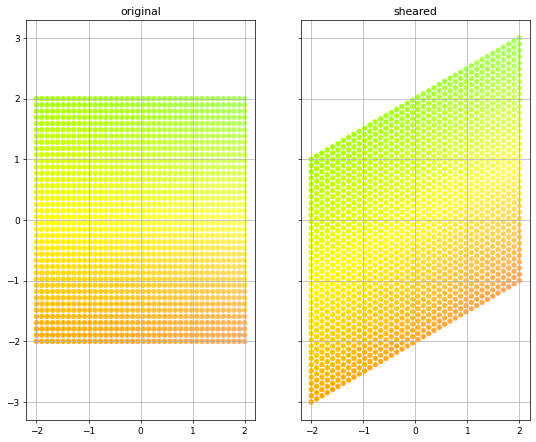

In [84]:
pltgrid([mgrid_xy, mgrid_xy_], titles = ["original", "sheared"], colors=colors)

In [85]:
theta = np.radians(45) #
rotating_r = np.array(
    [[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
rotating_r

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [86]:
AR_T = rotating_r@A
AR_T

array([0.2192031 , 0.96873629])

In [87]:
names = ['A', 'AR_T']
vectors_ = [A, AR_T]
plotvectors(vectors_, names)

In [88]:
mgrid_xy_ = mgrid_xy.copy()
for i in range(mgrid_xy_.shape[0]):
  mgrid_xy_[i,:] = rotating_r@mgrid_xy_[i,:]

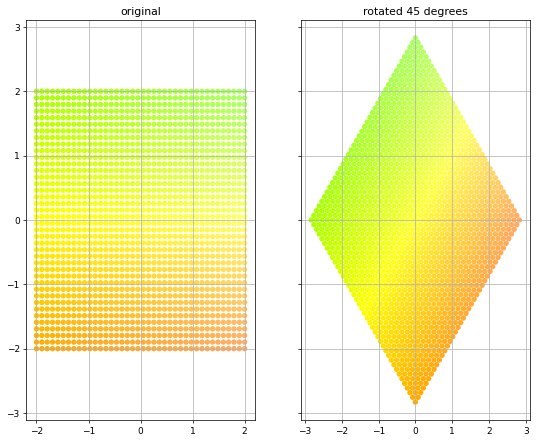

In [89]:
pltgrid([mgrid_xy, mgrid_xy_], titles = ["original", "rotated 45 degrees"], colors=colors)

In [90]:
def meshgrid(m=500, x_max=2.0):
  t1_, t2_ = torch.meshgrid(
    torch.linspace(-x_max, x_max, m),torch.linspace(-x_max, x_max, m))
  tall_ = torch.cat(
    ([t1_.unsqueeze(-1), t2_.unsqueeze(-1)]), dim=-1).view(-1, 2)
  return tall_

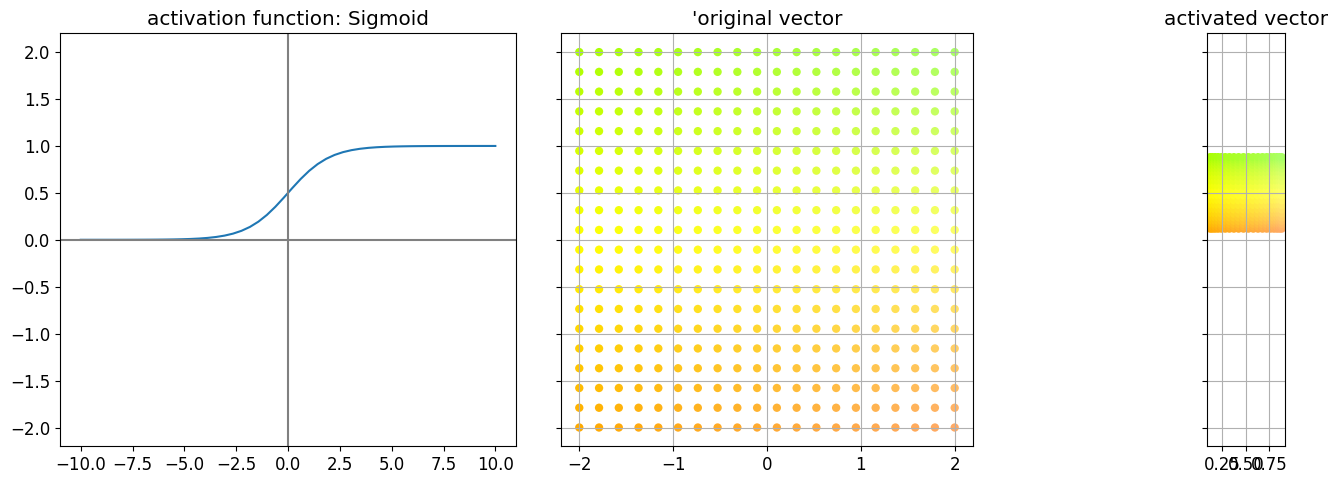

In [91]:
def pltgrid_fn(activation, activation_name, grid, colors):
  plt.rcParams.update({'font.size': 12})
  titles = ["'original vector", 'activated vector']
  grids = [grid, activation(grid)]
  c = len(grids)

  fig, axes = plt.subplots(1, c+1, figsize=(15,5), facecolor='w', sharey=True)
  x = torch.linspace(-10, 10, 50 )
  y = activation(x)
  axes[0].plot(x,y)
  axes[0].axvline(x=0, c='grey')
  axes[0].axhline(y=0, c='grey')
  axes[0].set_title(f"activation function: {activation_name}")

  for ax, grid, title in zip(axes[1:], grids, titles):
    ax.scatter(grid[:,0], grid[:,1], s=36, c=colors, edgecolor="none")
    ax.grid(True)
    ax.set_title(title)
    ax.set_aspect('equal')
  plt.tight_layout()
  #return fig

mgrid_xy = meshgrid(20, 2)
colors = list(map(colorizer, mgrid_xy[:,0], mgrid_xy[:,1]))
pltgrid_fn(torch.nn.functional.sigmoid, "Sigmoid", mgrid_xy, colors)

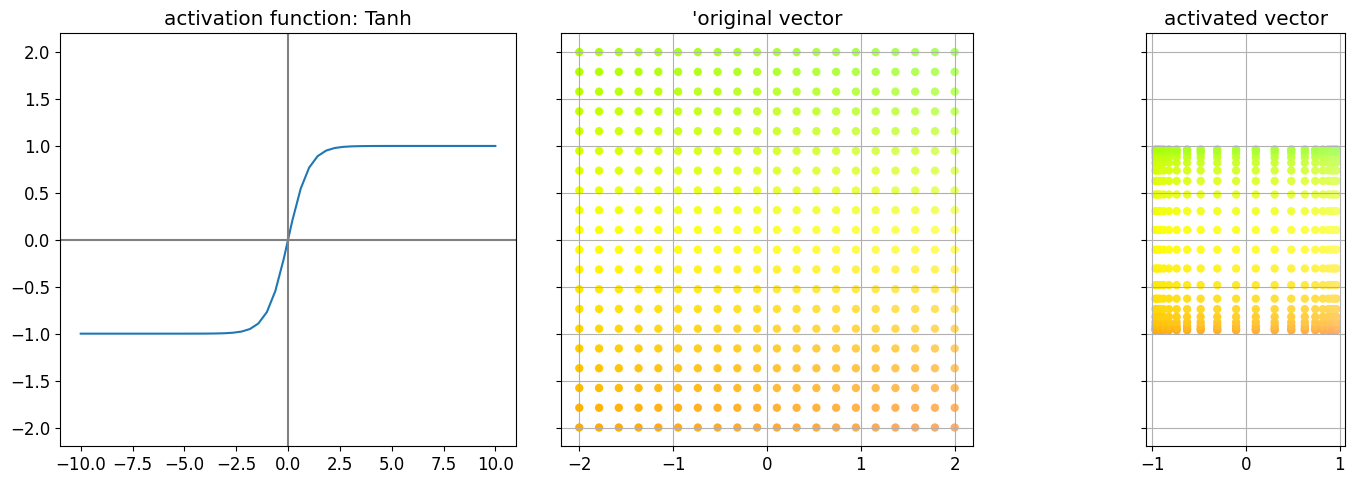

In [92]:
pltgrid_fn(torch.nn.functional.tanh, "Tanh", mgrid_xy, colors)

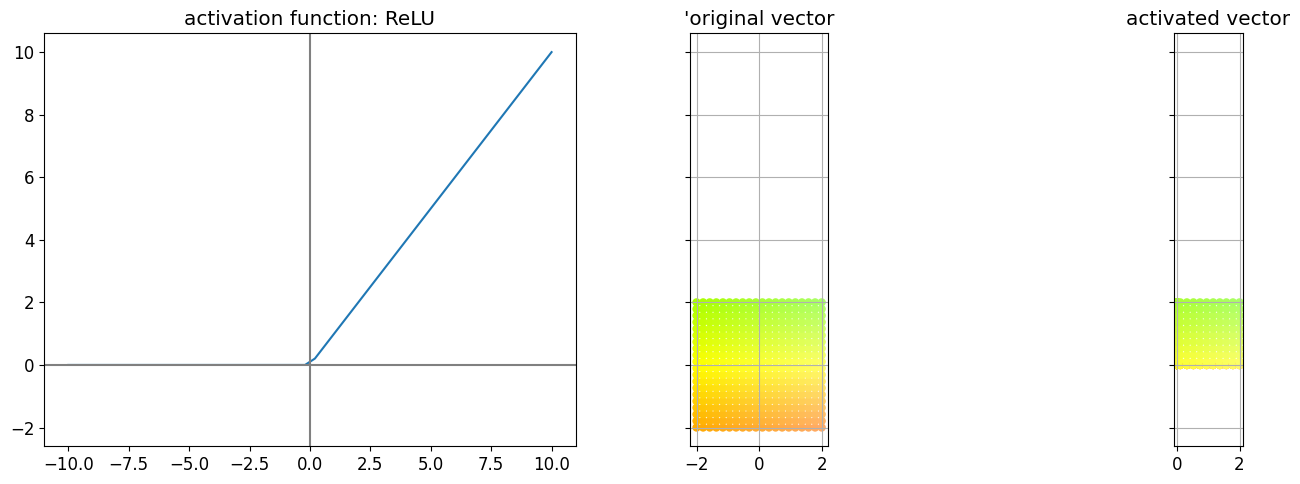

In [93]:
pltgrid_fn(torch.nn.functional.relu, "ReLU", mgrid_xy, colors)

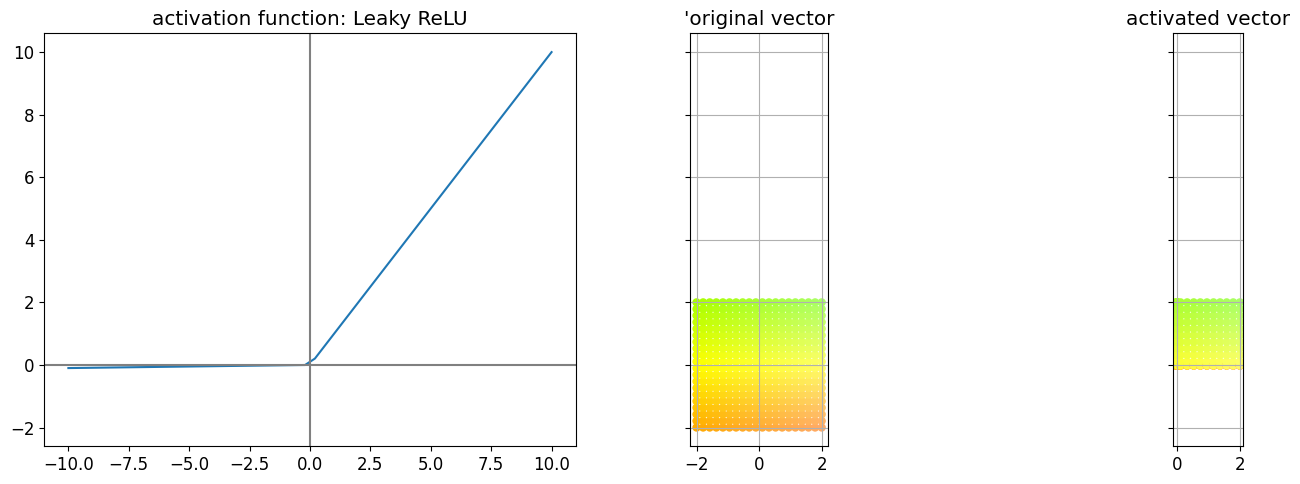

In [94]:
pltgrid_fn(torch.nn.functional.leaky_relu, "Leaky ReLU", mgrid_xy, colors)

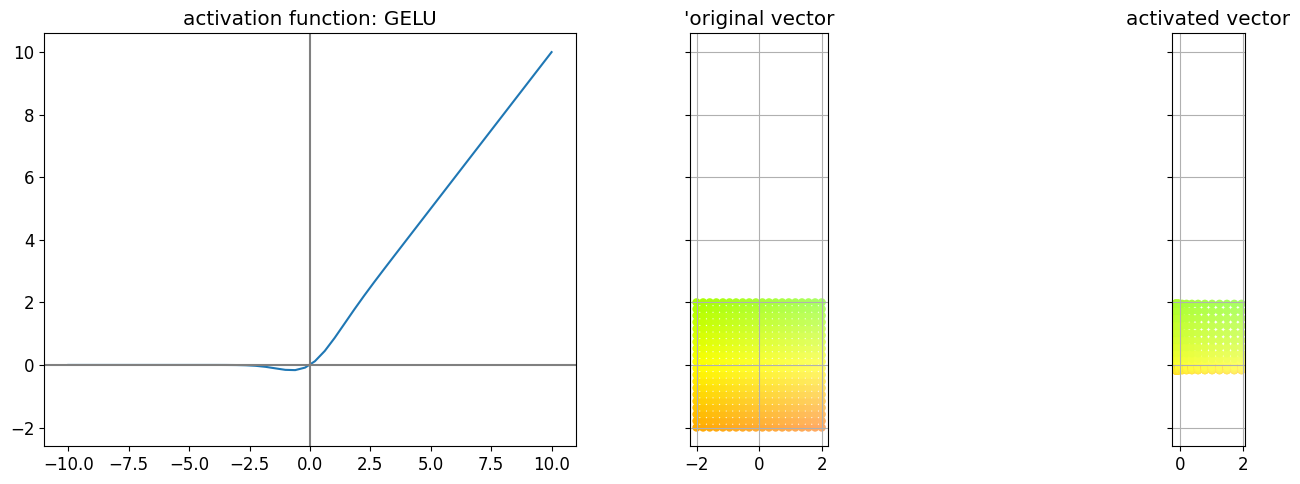

In [95]:
pltgrid_fn(torch.nn.functional.gelu, "GELU", mgrid_xy, colors)

In [96]:
x = torch.rand((3,))*10
y = torch.nn.functional.softmax(x, dim=-1)
x = x.detach().numpy()
#y = y.detach().numpy()
x, y

(array([9.275092 , 2.0209742, 6.325979 ], dtype=float32),
 tensor([9.4958e-01, 6.7160e-04, 4.9745e-02]))

In [97]:
from plotly.subplots import make_subplots
figure = make_subplots(rows=1, cols=2, subplot_titles=('raw output', 'softmax output'))
              #specs=[[{'type':'domain'}, {'type':'domain'}]])
#figure.add_trace(go_objs.Bar(x=x, y=y, name='raw output'), row=1, col=1)
figure.add_trace(go_objs.Bar(
    x=np.arange(3), y=x, text=x, texttemplate="%{y:.3f}"), row=1, col=1)
figure.add_trace(go_objs.Bar(
    x=np.arange(3), y=y, text=y, texttemplate="%{y:.3f}"), row=1, col=2)
figure.update_layout(height=400, width=600)

Gradient Descent

In [98]:
''' define a simple loss function '''
def lossfunction(x, y):
  return (x-4)**2 + (x-2)**2
mesh_size = 1
x_min, x_max = -10, 30
y_min, y_max = -30, 30
x_range = np.arange(x_min, x_max, mesh_size)
y_range = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(x_range, y_range)
l_fn = lossfunction(xx, yy)

In [99]:
fig = go_objs.Figure(data=[go_objs.Surface(z=l_fn, x=xx, y=yy)])
cam = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=-1, y=1.5, z=1.5)
)
fig.update_layout(scene_camera=cam, width=600, height=600,
  title_text='loss surface for a math fucntion', title_x =.5,
  #scene=dict(xaxis_title_='x', yaxis_title='y', z_axis_title='loss')
)
fig

In [100]:
''' gradient of loss function a vector of delta_x and delta_y '''
def gradient(x, y):
  return 2*(x-4), 2*(y-2)
max_iterations = 300
curr_iteration = 0
learning_rate = 0.001
curr_x, curr_y = 30, 31
opt_path_x = [curr_x]
opt_path_y = [curr_y]
opt_path_l = [lossfunction(curr_x, curr_y)]
while curr_iteration < max_iterations:
  prev_x= curr_x
  prev_y= curr_y
  curr_x = curr_x - learning_rate*gradient(curr_x, curr_y)[0]
  curr_y = curr_y - learning_rate*gradient(curr_x, curr_y)[1]
  opt_path_x.append(curr_x)
  opt_path_y.append(curr_y)
  opt_path_l.append(lossfunction(curr_x, curr_y))
  curr_iteration += 1

f'the optimal value is found at ', curr_x, curr_y, lossfunction(curr_x, curr_y)

('the optimal value is found at ',
 18.260532219276048,
 17.90597824457714,
 467.7676872311246)